In [1]:
# import the essential stuff
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# declare essential variables
image = "downloads/horse_rest.jpg"
prototxt_file = "downloads/MobileNetSSD_deploy.prototxt.txt"
model = "downloads/MobileNetSSD_deploy.caffemodel"
required_confidence = 0.2

In [4]:
# define the labels supported by the model
supported_labels = ["background", "aeroplane", "bicycle", "bird", "boat",
                    "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
                    "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
                    "sofa", "train", "tvmonitor"]

In [5]:
# load the model
neural_net = cv2.dnn.readNetFromCaffe(prototxt_file, model)

In [7]:
# prepare the image blob
image_raw = cv2.imread(image)
(height, width) = image_raw.shape[:2]
image_blob = cv2.dnn.blobFromImage(cv2.resize(image_raw, (300, 300)),
                                   0.007843, (300, 300), 127.5)

In [10]:
# pass the blob through neural network
neural_net.setInput(image_blob)
detections = neural_net.forward()
print(detections)

[[[[0.0000000e+00 7.0000000e+00 9.9487054e-01 7.6105893e-03
    2.7683762e-01 2.6440242e-01 5.2569389e-01]
   [0.0000000e+00 8.0000000e+00 6.1793989e-01 2.8473982e-01
    5.3825039e-01 3.9870122e-01 9.0555662e-01]
   [0.0000000e+00 1.2000000e+01 5.0561178e-01 2.8528383e-01
    5.3513718e-01 3.9997253e-01 9.0157878e-01]
   [0.0000000e+00 1.3000000e+01 9.9804115e-01 4.0576309e-01
    2.0251501e-01 8.3773762e-01 9.7304547e-01]
   [0.0000000e+00 1.5000000e+01 8.6793828e-01 5.2993059e-01
    1.2684941e-02 6.8850482e-01 5.8789355e-01]
   [0.0000000e+00 1.5000000e+01 2.6941484e-01 8.6366087e-01
    3.3569154e-01 9.1217333e-01 4.7463796e-01]]]]


In [13]:
# show the detections
for i in np.arange(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    
    # collect info about detected objects
    if confidence > required_confidence:
        object_index = int(detections[0, 0, i, 1])
        bounding_box = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
        (x, y, box_width, box_height) = bounding_box.astype("int")
        
        # the labelling stuff
        label = "{}: {:.2f}%".format(supported_labels[object_index], confidence*100)
        cv2.rectangle(image_raw, (x, y), (box_width, box_height), (0, 255, 0), 2)
        cv2.putText(image_raw, label, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# convert the image to RGB
#image_raw = cv2.cvtColor(image_raw, cv2.COLOR_BGR2RGB)

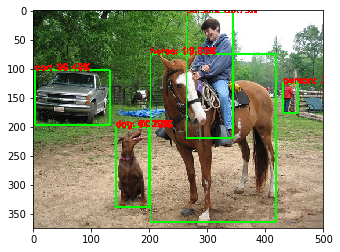

In [12]:
plt.imshow(image_raw)

In [14]:
cv2.imwrite("output.jpg", image_raw)

True